In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
from scipy import interpolate as sp

In [5]:
hbar = 1.054571817e-34
C = 1e-12 # Circuit capacitance 1 pF
C_c = 10e-15 # Coupling capacitance 1 fF
C_tot = C + C_c
omega = 2*np.pi*5e8 # qubit frequency 500 MHz
T_sep = 2*np.pi/omega # time between pulses
K_j = 483597.8484e9 # flux quantum Hz/V
Phi_0 = 2.067833758e-15 # flux quantum Wb
V_max = 2e-3 # pulse height 2 mV
pulse_width = 1/(V_max*K_j)
pulse_width = 2e-12
delta_theta = C_c*Phi_0*np.sqrt((2*omega)/(hbar*C_tot))
T_tot = (int(np.pi/(2*delta_theta)) + 1) * T_sep
n = round(np.pi/(delta_theta))
print("pulse width = ",pulse_width*1e12,' ps')
print("Seperation time = ",T_sep*1e12,' ps')
print("delta theta = ",delta_theta)
print("pulses for a pi rotation = ",np.pi/(2*delta_theta))
print("Total time for a pi rotation= ",T_tot*1e9,' ns')
print("n = ", n)
print("expected rotation angle = ",n*delta_theta*180/np.pi,' degrees')
print("<Z> =", (np.cos(n*delta_theta)))

pulse width =  2.0  ps
Seperation time =  2000.0000000000002  ps
delta theta =  0.15882058373799401
pulses for a pi rotation =  9.890382529925944
Total time for a pi rotation=  20.0  ns
n =  20
expected rotation angle =  181.99498295982266  degrees
<Z> = -0.999393879122697


Specify a normal distribution with $\int V(t)dt = \Phi_0$

pulse width =  2.0  ps


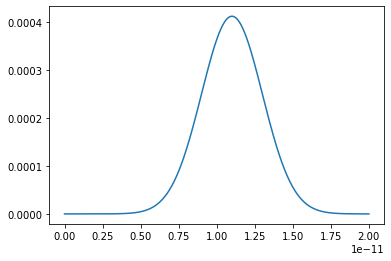

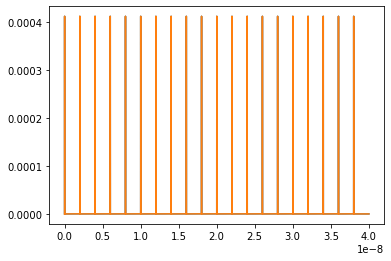

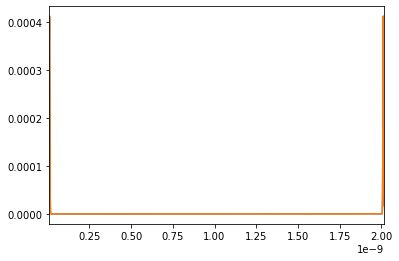

In [6]:
def normal_dist(x,x0,sigma):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-x0)**2/(2*sigma**2))

t_delay = 10e-12
n_steps = 1e6

times = np.linspace(0,t_delay + 5*pulse_width,int(n_steps))



print("pulse width = ",pulse_width*1e12,' ps')


plt.plot(times,Phi_0*normal_dist(times-t_delay,pulse_width/2,pulse_width))
plt.show()

#n=3

def normal_sfq(n,t_delay,pulse_width,T_sep,n_steps):
    n_steps = int(n_steps)
    t = np.linspace(0,t_delay + pulse_width/2 + n*T_sep,n_steps)
    pulse = Phi_0*normal_dist(t,t_delay + pulse_width/2,pulse_width)
    for i in range(n-1):
        pulse = np.add(pulse,Phi_0*normal_dist(t,t_delay + (pulse_width/2) + (i+1)*T_sep,pulse_width))
    return t,pulse

t,pulse = normal_sfq(n,t_delay,pulse_width,T_sep,n_steps)
pulse_func = sp.interp1d(t,pulse)

plt.plot(t,pulse)
plt.plot(t,pulse_func(t))
plt.show()

plt.plot(t,pulse)
plt.plot(t,pulse_func(t))
plt.xlim(t_delay,t_delay + 3*pulse_width+ T_sep)
plt.show()

pulse width = $\tau = \frac{t_c}{5}$, $t_c = 3.5 ps$

a1 =  1570796326.7948966
a2 =  38402647970019.74
rotation angle =  3.141592653589793
19.780765059851888
n =  20


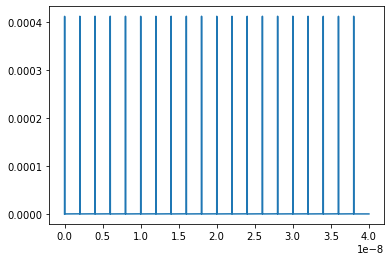

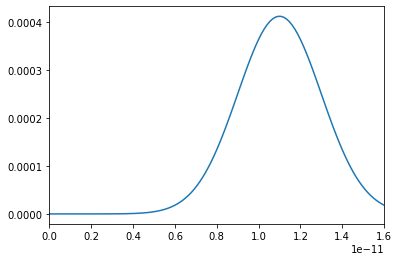

10.0%. Run time:   5.58s. Est. time left: 00:00:00:50
20.0%. Run time:  11.19s. Est. time left: 00:00:00:44
30.0%. Run time:  16.89s. Est. time left: 00:00:00:39
40.0%. Run time:  22.55s. Est. time left: 00:00:00:33
50.0%. Run time:  28.40s. Est. time left: 00:00:00:28
60.0%. Run time:  34.00s. Est. time left: 00:00:00:22
70.0%. Run time:  39.69s. Est. time left: 00:00:00:17
80.0%. Run time:  45.37s. Est. time left: 00:00:00:11
90.0%. Run time:  51.46s. Est. time left: 00:00:00:05
Total run time:  57.35s


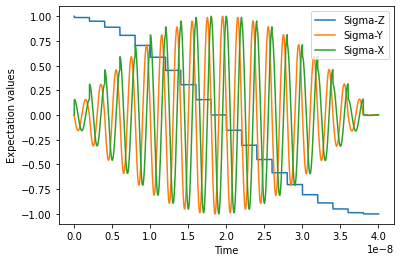

-0.9999938877844995


In [4]:
# Coupling capacitance 
hbar = 1.054571817e-34
a1 = hbar*omega*0.5 * (1/hbar)
a2 = C_c*np.sqrt(hbar * omega /(2*C_tot)) * (1/hbar) # removed V_max from the equation

print("a1 = ",a1)
print("a2 = ",a2)

theta = np.pi #rotation angle
print("rotation angle = ",theta)

#n = round(np.pi/(2*delta_theta)) # for a pi/2 rotation about the y axis
print(theta/delta_theta)
n = round(theta/(delta_theta)) 
print("n = ", n)

n_steps = 3e5

t,pulse = normal_sfq(n,t_delay,pulse_width,T_sep,n_steps)
pulse_func = sp.interp1d(t,pulse,fill_value = "extrapolate")

#plt.plot(t,pulse)
plt.plot(t,pulse_func(t))
plt.show()

#plt.plot(t,pulse)
plt.plot(t,pulse_func(t))
plt.xlim(0,t_delay + 3*pulse_width)
plt.show()

def H1_coeffs(t,args):
    return pulse_func(t)

H0 = a1*(qeye(2) - sigmaz())
H1 = a2*sigmay()

H = [H0,[H1,H1_coeffs]]

psi0 = basis(2, 0)
#psi0 = basis(2, 0) + (1+0j)*qutip.basis(2, 1) # |+>

result = sesolve(H, psi0, t, [sigmaz(), sigmay(),sigmax()],progress_bar=True)
fig, ax = plt.subplots()
ax.plot(result.times, result.expect[0]) 
ax.plot(result.times, result.expect[1]) 
ax.plot(result.times, result.expect[2]) 
ax.set_xlabel('Time') 
ax.set_ylabel('Expectation values') 
ax.legend(("Sigma-Z", "Sigma-Y","Sigma-X")) 
plt.show() 

exp_z = result.expect[0]
exp_y = result.expect[1]
exp_x = result.expect[2]

print(exp_z[-1])

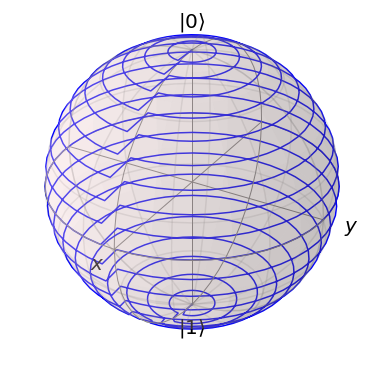

In [20]:
exp_z = result.expect[0]
#y_list = np.cos(np.pi*times*(1/T_tot))
#y_list = [i*0 for i in result.expect[1]]
#x_list = [i*0 for i in result.expect[2]]
#x_list = np.cos((3/2)*np.pi*times*(1/T_tot))
nskip = 300
# z_list = exp_z[::nskip]
# y_list = y_list[::nskip]
# x_list = x_list[::nskip]

# plt.plot(times[::nskip],z_list)
# b = qutip.Bloch()
# b.make_sphere()
# pnts = [x_list,y_list,z_list]
# b.add_points(pnts)
# b.render()
# b.show()


b = qutip.Bloch()
b.make_sphere()
pnts = [exp_x[::nskip],exp_y[::nskip],exp_z[::nskip]]
#b.add_points(pnts)
b.add_points(pnts,meth='l')
b.render()
#b.show()

### Animation

In [22]:
n_skip = 300
sx = exp_x[::n_skip]
sy = exp_y[::n_skip]
sz = exp_z[::n_skip]
print(len(sx))

1000


In [23]:
b = qutip.Bloch()
b.vector_color = ['r']
b.view = [-40, 30]
for i in range(len(sx)):
    b.clear()
    #b.add_vectors([np.sin(theta), 0, np.cos(theta)])
    b.add_points([sx[:i+1], sy[:i+1], sz[:i+1]], meth='l')
    b.save(dirc='temp')  # saving images to temp directory in current working directory


In [53]:
import cv2
import os
import re

image_folder = 'temp'
video_name = 'video.avi'

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
#print(images)
regex = re.compile(r'\d+')
dict = {images[i]:int(regex.findall(images[i])[0]) for i in range(len(images))}
sorted_dict = {k: v for k, v in sorted(dict.items(), key=lambda item: item[1])}  
images = list(sorted_dict.keys())


frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 30, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()

Introduce timing jitter errors

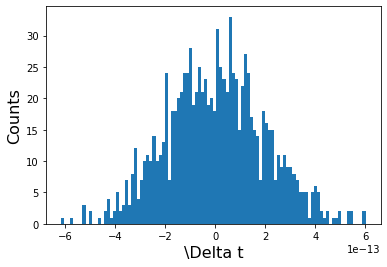

In [180]:
sigma = 2e-13

noise  = np.random.normal(0,sigma,1000)
plt.hist(noise,bins=100)
plt.xlabel(r'\Delta t',fontsize = 16)
plt.ylabel(r'Counts',fontsize = 16)
plt.show()

# x = np.linspace(-1e-12,1e-12,1000)
# plt.plot(x,(100*sigma)*normal_dist(x,0,sigma))




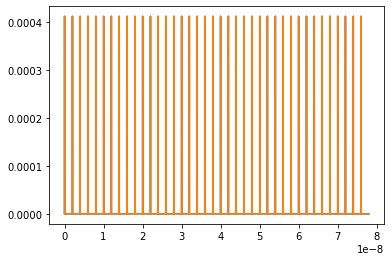

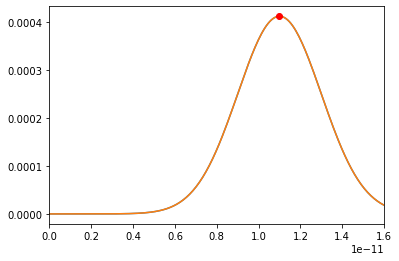

[2.016742388742389, 1.9754745284745285, 2.016898410898411, 1.9885803895803904, 2.0158062558062553, 1.9750064620064627, 2.018848687848688, 1.985693979693982, 2.0067569707569697, 2.010033436033437, 1.9991898961898964, 1.9807792817792829, 2.001296195296195, 2.0297702387702383, 1.9776588386588385, 1.9771907721907698, 2.021189020189023, 2.006756970756973, 1.9841337581337548, 1.998799840799846, 1.9917788437788428, 2.018536643536641, 1.9964595084595094, 2.0132318902318893, 2.009877413877417, 1.9686875646875628, 2.038429468429472, 1.9750844730844743, 2.0233733303733303, 1.963616844616839, 2.0144800674800725, 2.0000480180480156, 1.9866301126301142, 2.021032998033007, 1.9966935416935303, 1.9810913260913352, 2.014558078558077, 2.0025443725443686]
2e-09


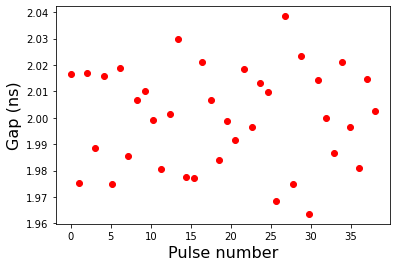

In [167]:
from scipy.signal import argrelextrema

def jitter_sfq(n,t_delay,pulse_width,T_sep,n_steps,noise_sigma):
    n_steps = int(n_steps)
    t = np.linspace(0,t_delay + pulse_width/2 + n*T_sep,n_steps)
    noise = np.random.normal(0,noise_sigma,1)
    pulse = Phi_0*normal_dist(t,t_delay + pulse_width/2,pulse_width)
    for i in range(n-1):
        noise = np.random.normal(0,noise_sigma,1)
        pulse = np.add(pulse,Phi_0*normal_dist(t,t_delay + (pulse_width/2) + (i+1)*T_sep + noise,pulse_width))
    return t,pulse

t,pulse = jitter_sfq(n,t_delay,pulse_width,T_sep,n_steps,sigma)
#t,pulse = normal_sfq(n,t_delay,pulse_width,T_sep,n_steps)
pulse_func = sp.interp1d(t,pulse)

maxima = argrelextrema(pulse_func(t),np.greater)

plt.plot(t,pulse)
plt.plot(t,pulse_func(t))
#plt.plot(t[maxima],pulse_func(t)[maxima],'ro')
plt.show()

plt.plot(t,pulse)
plt.plot(t,pulse_func(t))
plt.plot(t[maxima],pulse_func(t)[maxima],'ro')
plt.xlim(0,t_delay + 3*pulse_width)
plt.show()

gaps = []
for i in range(len(t[maxima])-1):

    max_gap = abs((t[maxima][i] - t[maxima][i+1])*1e9)
    gaps.append(max_gap)

x = np.linspace(0,len(gaps),len(gaps))
print(gaps)
plt.plot(x,gaps,'ro')
plt.xlabel('Pulse number',fontsize = 16)
plt.ylabel('Gap (ns)',fontsize = 16)

print(T_sep)



In [8]:
# Coupling capacitance 
hbar = 1.054571817e-34
a1 = hbar*omega*0.5 * (1/hbar)
a2 = C_c*np.sqrt(hbar * omega /(2*C_tot)) * (1/hbar) # removed V_max from the equation

print("a1 = ",a1)
print("a2 = ",a2)

theta = np.pi #rotation angle
print("rotation angle = ",theta)

#n = round(np.pi/(2*delta_theta)) # for a pi/2 rotation about the y axis
print(theta/delta_theta)
n = round(theta/(delta_theta)) 
print("n = ", n)

noise_sd = 1e-11

t,pulse = jitter_sfq(n,t_delay,pulse_width,T_sep,n_steps,noise_sd)
pulse_func = sp.interp1d(t,pulse,fill_value = "extrapolate")

#plt.plot(t,pulse)
plt.plot(t,pulse_func(t))
plt.show()

#plt.plot(t,pulse)
plt.plot(t,pulse_func(t))
plt.xlim(0,t_delay + 3*pulse_width)
plt.show()

def H1_coeffs(t,args):
    return pulse_func(t)

H0 = a1*(qeye(2) - sigmaz())
H1 = a2*sigmay()

H = [H0,[H1,H1_coeffs]]

psi0 = basis(2, 0)
#psi0 = basis(2, 0) + (1+0j)*qutip.basis(2, 1) # |+>

result = sesolve(H, psi0, t, [sigmaz(), sigmay(),sigmax()],progress_bar=True)
fig, ax = plt.subplots()
ax.plot(result.times, result.expect[0]) 
ax.plot(result.times, result.expect[1]) 
ax.plot(result.times, result.expect[2]) 
ax.set_xlabel('Time') 
ax.set_ylabel('Expectation values') 
ax.legend(("Sigma-Z", "Sigma-Y","Sigma-X")) 
plt.show() 

exp_z = result.expect[0]
exp_y = result.expect[1]
exp_x = result.expect[2]

print(exp_z[-1])

a1 =  1570796326.7948966
a2 =  38402647970019.74
rotation angle =  3.141592653589793
19.780765059851888
n =  20


NameError: name 'jitter_sfq' is not defined

### Examining Leakage

$H_\text{free} = \hbar\omega_{10}|1\rang\lang1|+ \hbar(\omega_{10}+\omega_{21})|2\rang\lang2|$

In [58]:

hbar = 1.054571817e-34
C = 1e-12 # Circuit capacitance 1 pF
C_c = 5e-15 # Coupling capacitance 1 fF
C_tot = C + C_c
omega_10 = 2*np.pi*5e8 # 500 MHz
omega_20 = 2*np.pi*8e10 # 8 GHz
T_sep = 2*np.pi/omega_10 # time between pulses
K_j = 483597.8484e9 # flux quantum Hz/V
Phi_0 = 2.067833758e-15 # flux quantum Wb
V_max = 2e-3 # pulse height 2 mV
pulse_width = 1/(V_max*K_j)
pulse_width = 2e-12
delta_theta = C_c*Phi_0*np.sqrt((2*omega_10)/(hbar*C_tot))
T_tot = (int(np.pi/(2*delta_theta)) + 1) * T_sep
n = round(np.pi/(delta_theta))
print("pulse width = ",pulse_width*1e12,' ps')
print("Seperation time = ",T_sep*1e12,' ps')
print("delta theta = ",delta_theta)
print("pulses for a pi rotation = ",np.pi/(delta_theta))
print("Total time for a pi rotation= ",T_tot*1e9,' ns')
print("n = ", n)
print("expected rotation angle = ",n*delta_theta*180/np.pi,' degrees')
print("<Z> =", (np.cos(n*delta_theta)))

b = C_c*np.sqrt(hbar * omega_10 /(2*C_tot)) * (1/hbar) 

free_matrix = [0,0,0],[0,omega_10,0],[0,0,omega_20]
H_free = Qobj(free_matrix)

H_sfq = 1j*b*(create(3) - destroy(3))

Sz = [1,0,0],[0,0,0],[0,0,-1]
Sz = Qobj(Sz)
#Sx = [0,1/np.sqrt(2),0],[1/np.sqrt(2),0,1/np.sqrt(2)],[0,1/np.sqrt(2),0]
Sx = create(3) + destroy(3)
Sy =  1j * (create(3) - destroy(3))

print(H_free)
print(H_sfq)



pulse width =  2.0  ps
Seperation time =  2000.0000000000002  ps
delta theta =  0.07960758482367863
pulses for a pi rotation =  39.463484045497026
Total time for a pi rotation=  40.0  ns
n =  39
expected rotation angle =  177.8859664774331  degrees
<Z> = -0.9993193886166417
Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.14159265e+09 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.02654825e+11]]
Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0.+0.00000000e+00j 0.-1.92490292e+13j 0.+0.00000000e+00j]
 [0.+1.92490292e+13j 0.+0.00000000e+00j 0.-2.72222382e+13j]
 [0.+0.00000000e+00j 0.+2.72222382e+13j 0.+0.00000000e+00j]]


rotation angle =  3.141592653589793
39.463484045497026
n =  39


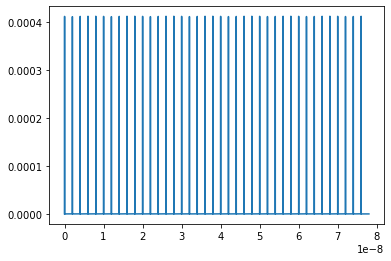

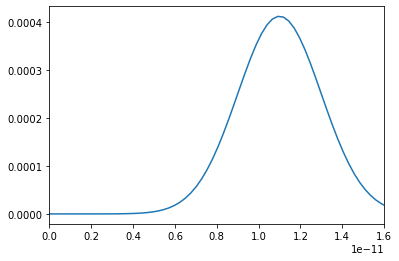

10.0%. Run time:  17.84s. Est. time left: 00:00:02:40
20.0%. Run time:  36.65s. Est. time left: 00:00:02:26
30.0%. Run time:  56.73s. Est. time left: 00:00:02:12
40.0%. Run time:  77.09s. Est. time left: 00:00:01:55
50.0%. Run time:  97.22s. Est. time left: 00:00:01:37
60.0%. Run time: 118.12s. Est. time left: 00:00:01:18
70.0%. Run time: 139.81s. Est. time left: 00:00:00:59
80.0%. Run time: 159.67s. Est. time left: 00:00:00:39
90.0%. Run time: 179.63s. Est. time left: 00:00:00:19
Total run time: 199.71s


In [59]:
theta = np.pi #rotation angle
print("rotation angle = ",theta)

#n = round(np.pi/(2*delta_theta)) # for a pi/2 rotation about the y axis
print(theta/delta_theta)
n = round(theta/(delta_theta)) 
#n = 27
print("n = ", n)

n_steps = 3e5

t,pulse = normal_sfq(n,t_delay,pulse_width,T_sep,n_steps)
pulse_func = sp.interp1d(t,pulse,fill_value = "extrapolate")

#plt.plot(t,pulse)
plt.plot(t,pulse_func(t))
plt.show()

#plt.plot(t,pulse)
plt.plot(t,pulse_func(t))
plt.xlim(0,t_delay + 3*pulse_width)
plt.show()

def H1_coeffs(t,args):
    return pulse_func(t)

H = [H_free,[H_sfq,H1_coeffs]]

psi0 = basis(3, 0)

result = sesolve(H, psi0, t,progress_bar=True)





In [60]:
print(result.states[0])

print(result.states[-1])

exp_0 = [abs(result.states[i][0]) for i in range(len(result.states))]
exp_0 = [(exp_0[i][0][0])**2 for i in range(len(exp_0))]

exp_1 = [abs(result.states[i][1]) for i in range(len(result.states))]
exp_1 = [(exp_1[i][0][0])**2 for i in range(len(exp_1))]

exp_2 = [abs(result.states[i][2]) for i in range(len(result.states))]
exp_2 = [(exp_2[i][0][0])**2 for i in range(len(exp_2))]



Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]]
Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
Qobj data =
[[0.15831104-0.00044288j]
 [0.70982824+0.00461814j]
 [0.68571639+0.02920618j]]


In [61]:
import csv
with open('data.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    for i in range(len(exp_0)):
        writer.writerow([exp_0[i],exp_1[i],exp_2[i]])


In [62]:
def csv_reader(filename):
    with open(filename, 'r') as csvfile:
        reader = csv.reader(csvfile)
        data = list(reader)
    return data

data = csv_reader('data.csv')

print(data[:5])
print(str(5.5e8/1e8))

[['1.0', '0.0', '0.0'], ['1.0', '1.3998997632189411e-18', '1.0044270665523973e-34'], ['1.0', '1.7975543376789896e-17', '3.9551829618987005e-33'], ['1.0', '8.624881413832453e-17', '2.60133821606287e-32'], ['1.0', '2.785532268096148e-16', '1.5571155239798026e-31']]
5.5


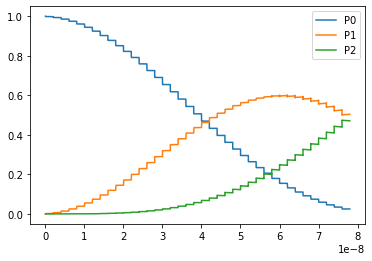

In [63]:
plt.plot(t,exp_0,label='P0')
plt.plot(t,exp_1,label='P1')
plt.plot(t,exp_2,label='P2')
plt.legend()


Leakage Experiment

In [144]:
anharm_test = np.arange(0,10,1)
print(anharm_test)
omega_20_test = [(n*omega_10) + (2*omega_10) for n in anharm_test]
omega_20_GHz = [i*1e-9*(1/(2*np.pi)) for i in omega_20_test]
print(omega_20_GHz)
print(omega_20_test)
# print(round(omega_20_test[0]/1e9,2))
print(omega_10/(2*np.pi*1e8))

omega_20_test = np.arange(2*np.pi*1e9,2*np.pi*1e10,2*np.pi*1e9)
omega_20_GHz = [i*1e-9*(1/(2*np.pi)) for i in omega_20_test]
print(omega_20_GHz)
print(omega_20_test)

[0 1 2 3 4 5 6 7 8 9]
[1.0000000000000002, 1.5, 2.0000000000000004, 2.5, 3.0, 3.5000000000000004, 4.000000000000001, 4.5, 5.000000000000001, 5.500000000000001]
[6283185307.179586, 9424777960.769379, 12566370614.359173, 15707963267.948965, 18849555921.538757, 21991148575.128555, 25132741228.718346, 28274333882.308136, 31415926535.897934, 34557519189.487724]
5.000000000000001
[1.0000000000000002, 2.0000000000000004, 3.0, 4.000000000000001, 5.000000000000001, 6.000000000000001, 7.0, 8.000000000000002, 9.000000000000002]
[6.28318531e+09 1.25663706e+10 1.88495559e+10 2.51327412e+10
 3.14159265e+10 3.76991118e+10 4.39822972e+10 5.02654825e+10
 5.65486678e+10]


In [138]:
theta = np.pi #rotation angle
n = round(theta/(delta_theta)) 
n_steps = 3e5
t,pulse = normal_sfq(n,t_delay,pulse_width,T_sep,n_steps)
pulse_func = sp.interp1d(t,pulse,fill_value = "extrapolate")

#omega_20_test = [5.5e8,1e9,5e9,1e10,5e10,1e11,5e11,1e12,5e12,1e13]
#omega_20_test = [5.5e8,7.5e8,1e9,2e9,3e9,4e9,6e9,7e9,8e9,9e9]

exp_results_0 = []
exp_results_1 = []
exp_results_2 = []

t,pulse = normal_sfq(n,t_delay,pulse_width,T_sep,n_steps)
pulse_func = sp.interp1d(t,pulse,fill_value = "extrapolate")

for i in range(len(omega_20_test)):
    omega_20 = omega_20_test[i]
    
    b = C_c*np.sqrt(hbar * omega_10 /(2*C_tot)) * (1/hbar) 
    free_matrix = [0,0,0],[0,omega_10,0],[0,0,omega_20]
    H_free = Qobj(free_matrix)
    H_sfq = 1j*b*(create(3) - destroy(3))

    def H1_coeffs(t,args):
        return pulse_func(t)

    H = [H_free,[H_sfq,H1_coeffs]]

    psi0 = basis(3, 0)
    
    result = sesolve(H, psi0, t,progress_bar=True)
    
    exp_0 = [abs(result.states[i][0]) for i in range(len(result.states))]
    exp_0 = [(exp_0[i][0][0])**2 for i in range(len(exp_0))]

    exp_1 = [abs(result.states[i][1]) for i in range(len(result.states))]
    exp_1 = [(exp_1[i][0][0])**2 for i in range(len(exp_1))]

    exp_2 = [abs(result.states[i][2]) for i in range(len(result.states))]
    exp_2 = [(exp_2[i][0][0])**2 for i in range(len(exp_2))]

    print(((i+1)/len(omega_20_test))*100,'%')

    filename = 'data_'+str(round(omega_20_test[i]/1e9,2))+'GHz.csv'

    with open(filename, 'w') as csvfile:
        writer = csv.writer(csvfile)
        for i in range(len(exp_0)):
            writer.writerow([t[i],exp_0[i],exp_1[i],exp_2[i]])

    

            




10.0%. Run time:   9.41s. Est. time left: 00:00:01:24
20.0%. Run time:  18.68s. Est. time left: 00:00:01:14
30.0%. Run time:  27.82s. Est. time left: 00:00:01:04
40.0%. Run time:  36.94s. Est. time left: 00:00:00:55
50.0%. Run time:  46.18s. Est. time left: 00:00:00:46
60.0%. Run time:  55.43s. Est. time left: 00:00:00:36
70.0%. Run time:  64.73s. Est. time left: 00:00:00:27
80.0%. Run time:  74.10s. Est. time left: 00:00:00:18
90.0%. Run time:  83.61s. Est. time left: 00:00:00:09
Total run time:  93.07s
11.11111111111111 %
10.0%. Run time:   9.39s. Est. time left: 00:00:01:24
20.0%. Run time:  18.73s. Est. time left: 00:00:01:14
30.0%. Run time:  27.99s. Est. time left: 00:00:01:05
40.0%. Run time:  37.58s. Est. time left: 00:00:00:56
50.0%. Run time:  47.79s. Est. time left: 00:00:00:47
60.0%. Run time:  57.85s. Est. time left: 00:00:00:38
70.0%. Run time:  68.04s. Est. time left: 00:00:00:29
80.0%. Run time:  78.04s. Est. time left: 00:00:00:19
90.0%. Run time:  88.01s. Est. time le

In [139]:
P1 = []
for freq in omega_20_test:
    filename = 'data_'+str(round(freq/1e9,2))+'GHz.csv'
    data = csv_reader(filename)
    P1.append(float(data[-1][2]))
    

In [140]:
print(P1)

[0.0743268748339191, 0.07540534431488244, 0.07573397616888698, 0.07606259178916204, 0.07645251899680705, 0.07693163911288221, 0.0775253955803889, 0.07826163772675955, 0.0791520086402763]


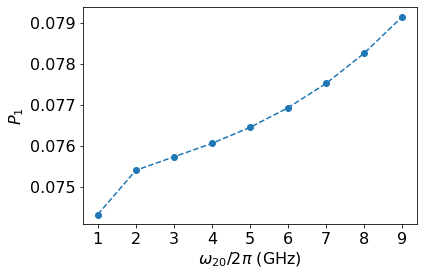

ValueError: x and y must have same first dimension, but have shapes (10,) and (9,)

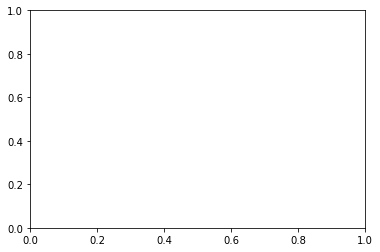

In [141]:
omega_20_GHz = [freq/(2*np.pi*1e9) for freq in omega_20_test]

# f = sp.CubicSpline(omega_20_GHz,P1,)
# omega_plot = np.linspace(min(omega_20_GHz),max(omega_20_GHz),100)
# plt.plot(omega_plot,f(omega_plot))

plt.plot(omega_20_GHz,P1,'o--')
plt.xlabel(r'$\omega_{20}/2\pi$ (GHz)',fontsize = 16)
plt.ylabel(r'$P_1$',fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.savefig("P1_vs_omega_20_0p8_1p2GHz.png", dpi = 300, bbox_inches = 'tight')
plt.show()

anharm_x100 = [i*100 for i in anharm_test]
plt.plot(anharm_x100,P1,'o--')
plt.xlabel(r'$\eta$',fontsize = 16)
plt.ylabel(r'$P_1$',fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.savefig("P1_vs_anharm_tight.png", dpi = 300, bbox_inches = 'tight')
plt.show()

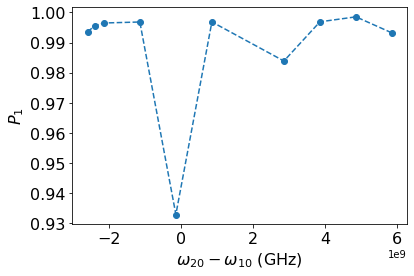

In [94]:
anharm = [(omega_20_test[i]-omega_10) for i in range(len(omega_20_test))]
plt.plot(anharm,P1,'o--')
plt.xlabel(r'$\omega_{20}-\omega_{10}$ (GHz)',fontsize = 16)
plt.ylabel(r'$P_1$',fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.savefig('anharm_vs_omega_20_0p5_9GHz.png', dpi = 300, bbox_inches = 'tight')
plt.show()

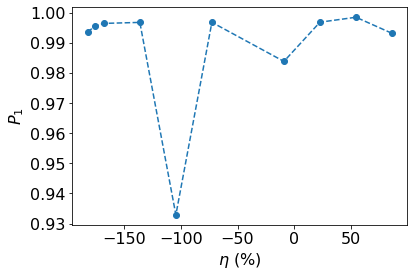

In [97]:
anharm = [((omega_20_test[i]-2*omega_10)*100)/omega_10 for i in range(len(omega_20_test))]
plt.plot(anharm,P1,'o--')
plt.xlabel(r'$\eta$ (%)',fontsize = 16)
plt.ylabel(r'$P_1$',fontsize=16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
#plt.savefig('anharm_vs_omega_20_0p5_9GHz.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [67]:
e055GHz = csv_reader('data_0.55GHz.csv')
e0_055GHz = [float(e055GHz[i][1]) for i in range(len(e055GHz))]
e1_055GHz = [float(e055GHz[i][2]) for i in range(len(e055GHz))]
e2_055GHz = [float(e055GHz[i][3]) for i in range(len(e055GHz))]

e1GHz = csv_reader('data_1.0GHz.csv')
e0_1GHz = [float(e1GHz[i][1]) for i in range(len(e1GHz))]
e1_1GHz = [float(e1GHz[i][2]) for i in range(len(e1GHz))]
e2_1GHz = [float(e1GHz[i][3]) for i in range(len(e1GHz))]

# e5GHz = csv_reader('data_5.0GHz.csv')
# e0_5GHz = [float(e5GHz[i][0]) for i in range(len(e5GHz))]
# e1_5GHz = [float(e5GHz[i][1]) for i in range(len(e5GHz))]
# e2_5GHz = [float(e5GHz[i][2]) for i in range(len(e5GHz))]

# e10GHz = csv_reader('data_10.0GHz.csv')
# e0_10GHz = [float(e10GHz[i][0]) for i in range(len(e10GHz))]
# e1_10GHz = [float(e10GHz[i][1]) for i in range(len(e10GHz))]
# e2_10GHz = [float(e10GHz[i][2]) for i in range(len(e10GHz))]

# e50GHz = csv_reader('data_50.0GHz.csv')
# e0_50GHz = [float(e50GHz[i][0]) for i in range(len(e50GHz))]
# e1_50GHz = [float(e50GHz[i][1]) for i in range(len(e50GHz))]
# e2_50GHz = [float(e50GHz[i][2]) for i in range(len(e50GHz))]

# e100GHz = csv_reader('data_100.0GHz.csv')
# e0_100GHz = [float(e100GHz[i][0]) for i in range(len(e100GHz))]
# e1_100GHz = [float(e100GHz[i][1]) for i in range(len(e100GHz))]
# e2_100GHz = [float(e100GHz[i][2]) for i in range(len(e100GHz))]

# e500GHz = csv_reader('data_500.0GHz.csv')
# e0_500GHz = [float(e500GHz[i][0]) for i in range(len(e500GHz))]
# e1_500GHz = [float(e500GHz[i][1]) for i in range(len(e500GHz))]
# e2_500GHz = [float(e500GHz[i][2]) for i in range(len(e500GHz))]

# e1000GHz = csv_reader('data_1000.0GHz.csv')
# e0_1000GHz = [float(e1000GHz[i][0]) for i in range(len(e1000GHz))]
# e1_1000GHz = [float(e1000GHz[i][1]) for i in range(len(e1000GHz))]
# e2_1000GHz = [float(e1000GHz[i][2]) for i in range(len(e1000GHz))]

# e5000GHz = csv_reader('data_5000.0GHz.csv')
# e0_5000GHz = [float(e5000GHz[i][0]) for i in range(len(e5000GHz))]
# e1_5000GHz = [float(e5000GHz[i][1]) for i in range(len(e5000GHz))]
# e2_5000GHz = [float(e5000GHz[i][2]) for i in range(len(e5000GHz))]

# e10000GHz = csv_reader('data_10000.0GHz.csv')
# e0_10000GHz = [float(e10000GHz[i][0]) for i in range(len(e10000GHz))]
# e1_10000GHz = [float(e10000GHz[i][1]) for i in range(len(e10000GHz))]
# e2_10000GHz = [float(e10000GHz[i][2]) for i in range(len(e10000GHz))]



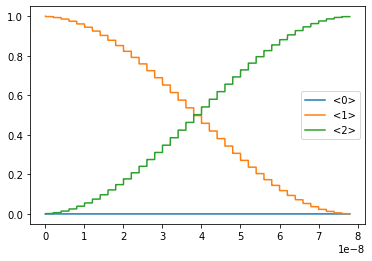

In [68]:
plt.plot(t,e0_5GHz,label='<0>')
plt.plot(t,e1_5GHz,label='<1>')
plt.plot(t,e2_5GHz,label='<2>')
plt.legend()

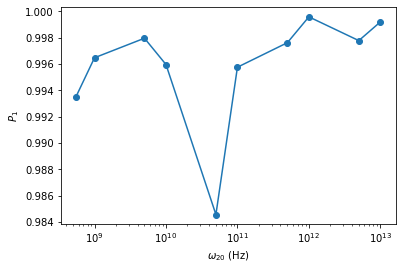

In [73]:
P1_055GHz = e1_055GHz[-1]
P1_1GHz = e1_1GHz[-1]
P1_5GHz = e2_5GHz[-1]
P1_10GHz = e2_10GHz[-1]
P1_50GHz = e2_50GHz[-1]
P1_100GHz = e2_100GHz[-1]
P1_500GHz = e2_500GHz[-1]
P1_1000GHz = e2_1000GHz[-1]
P1_5000GHz = e2_5000GHz[-1]
P1_10000GHz = e2_10000GHz[-1]

P1_list = [P1_055GHz,P1_1GHz,P1_5GHz,P1_10GHz,P1_50GHz,P1_100GHz,P1_500GHz,P1_1000GHz,P1_5000GHz,P1_10000GHz]
omega_20_test = [5.5e8,1e9,5e9,1e10,5e10,1e11,5e11,1e12,5e12,1e13]

plt.plot(omega_20_test,P1_list,'o-')
plt.xscale('log')
plt.xlabel(r'$\omega_{20}$ (Hz)')
plt.ylabel(r'$P_{1}$')
plt.savefig('P1_vs_omega_20.png',dpi = 300, bbox_inches='tight')
plt.show()

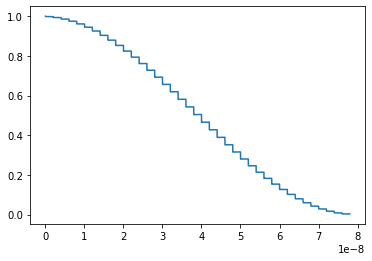

0.9935182590494054


In [40]:
plt.plot(t,e0_550MHz,label='P0')
plt.show()
print(e1_550MHz[-1])